In [33]:
import os
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import svm
from sklearn import datasets
from sklearn.svm import SVR

from sklearn.model_selection import GridSearchCV

# Where to save the figures
PROJECT_ROOT_DIR = "./"
IMAGE_ID = "Final_Images"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "Images", IMAGE_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
dataset = pd.read_csv('BasicModel.csv')

dataset = dataset.dropna()




In [3]:
dataset.shape

(370, 9)

In [4]:
dataset.describe()

,L*,SST,Age,Depth (amcd),Alkane,Alkane1,Alkanol,Alkanol1
count,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000
mean,69.273324,15.045189,298.089270,13.569243,93.996162,338.850973,53.697297,237.909676
std,8.831273,2.219039,247.433737,11.521146,74.432824,249.090837,58.012051,255.191827
min,47.140000,7.980000,6.910000,0.250000,0.790000,3.630000,0.470000,3.080000
25%,61.432500,13.460000,180.597500,8.685000,35.772500,133.162500,11.770000,56.480000
50%,70.050000,15.275000,338.505000,14.970000,75.960000,288.015000,30.670000,139.590000
75%,75.765000,16.475000,369.637500,16.575000,131.967500,475.337500,76.437500,333.975000
max,85.830000,22.310000,2706.930000,128.590000,458.040000,1608.700000,333.890000,2137.050000


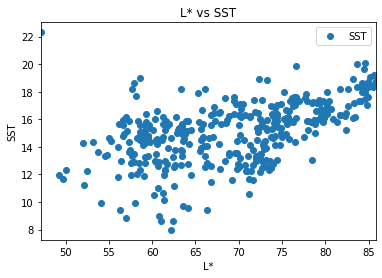

In [5]:
dataset.plot(x='L*', y='SST', style='o')  
plt.title('L* vs SST')  
plt.xlabel('L*')  
plt.ylabel('SST')  
plt.show()

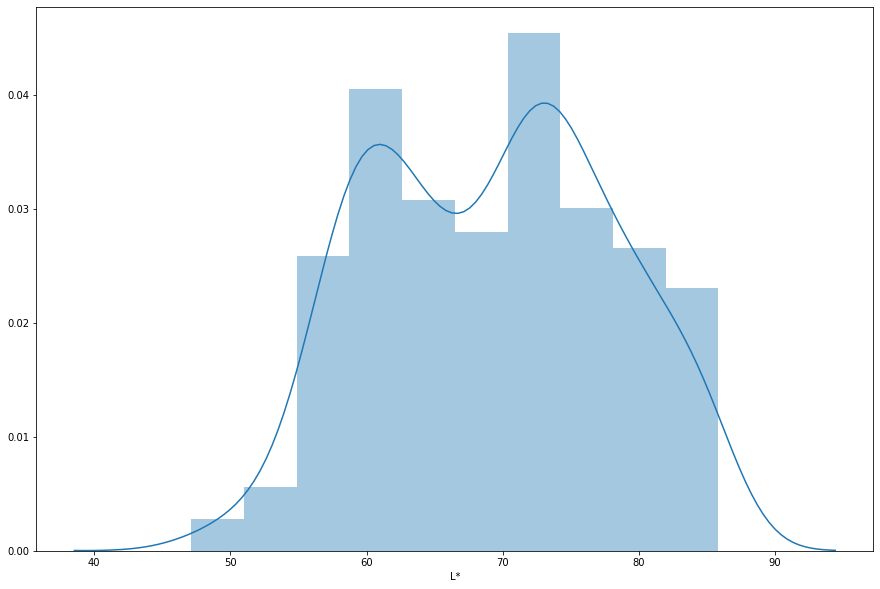

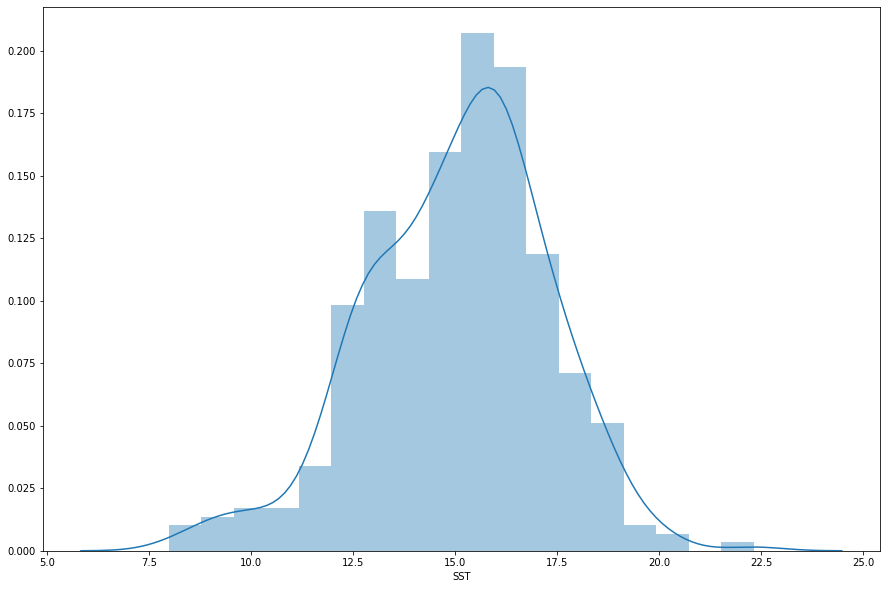

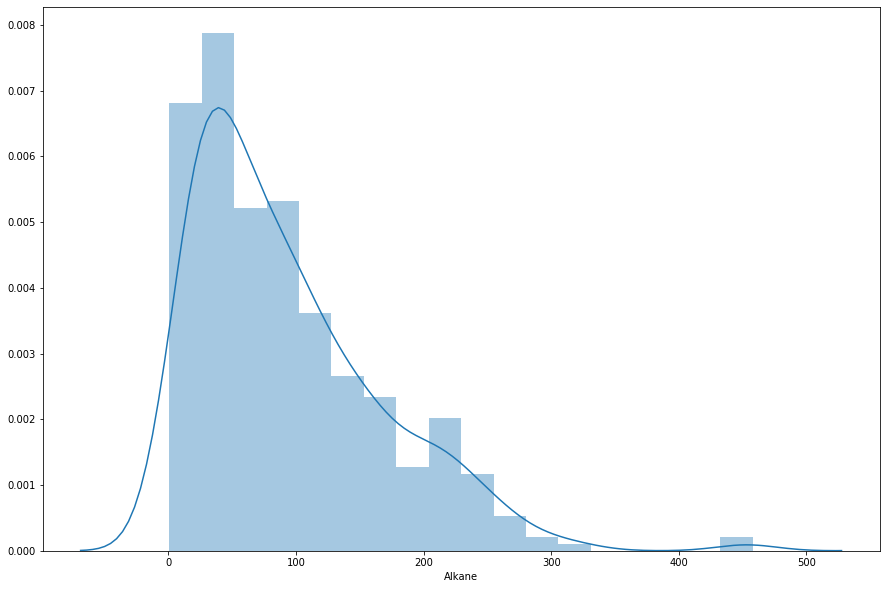

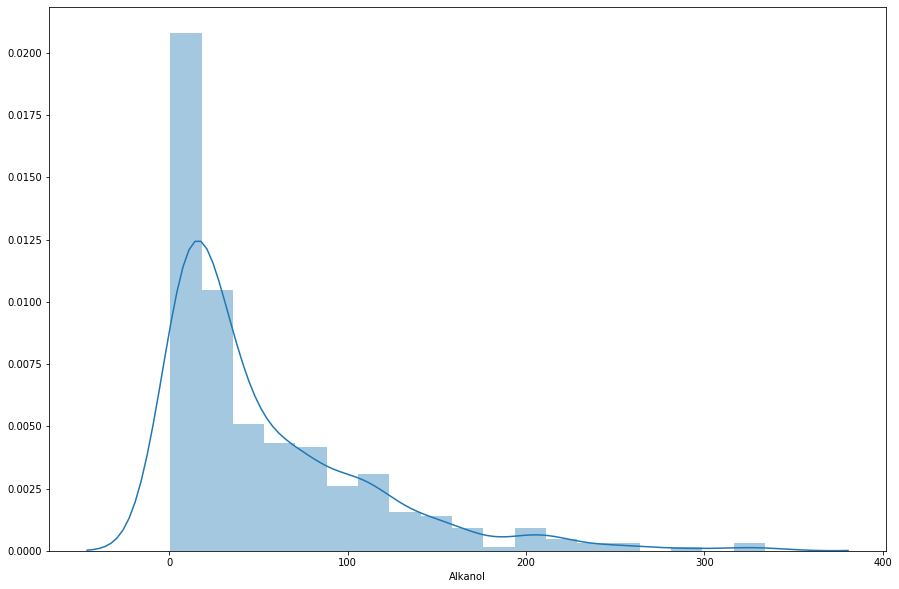

In [6]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['L*'])

plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['SST'])

plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['Alkane'])

plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['Alkanol'])


In [7]:
X = dataset['L*'].values.reshape(-1,1)
y = dataset['SST'].values.reshape(-1,1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[5.97291201]
[[0.13038157]]


In [11]:
y_pred = regressor.predict(X_test)

In [12]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

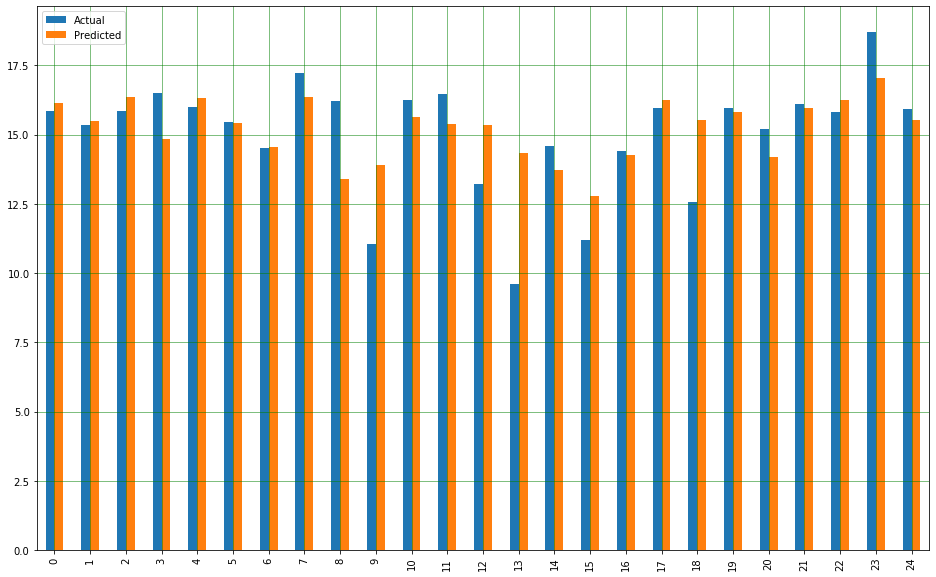

In [13]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

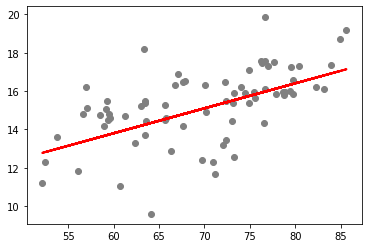

In [14]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [15]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.233478210298808
Mean Squared Error: 2.5483351521994173
Root Mean Squared Error: 1.596350573088323


Saving figure LR_10_preds_vs_true


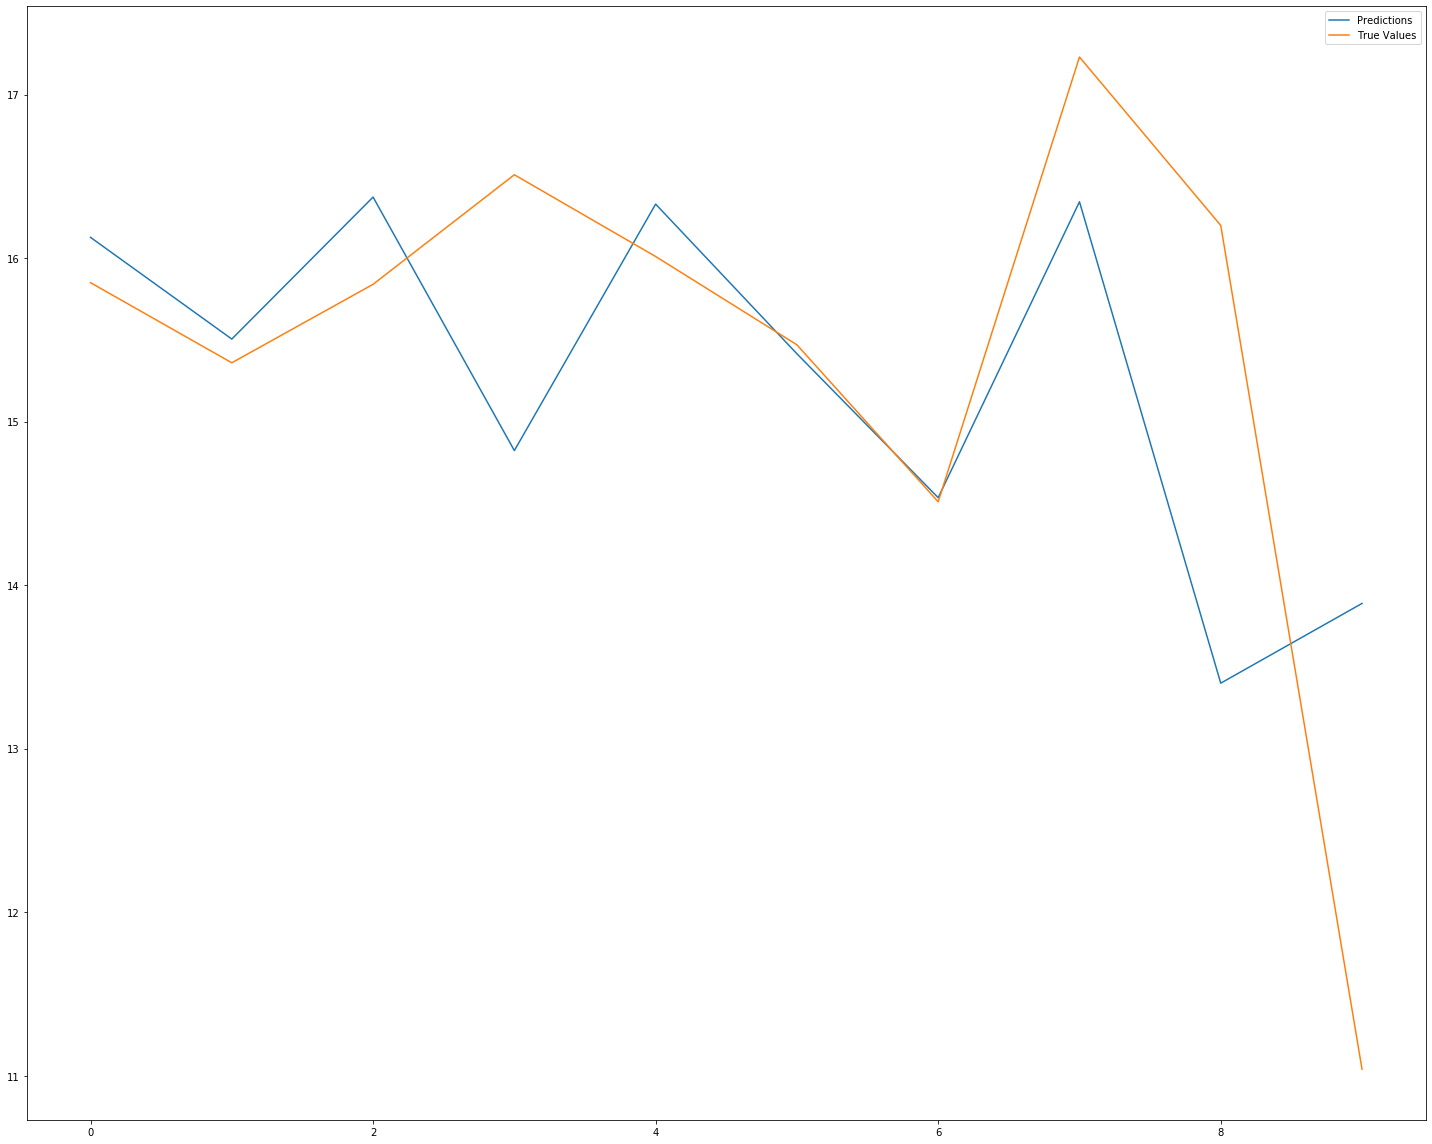

In [34]:

true = y_test.copy()

plt.figure(figsize=(20, 16))
plt.plot(y_pred[:10], label='Predictions')
plt.plot(true[:10], label='True Values')
plt.legend()
save_fig('LR_10_preds_vs_true')


Ok, not good.  We will try to CV to see if that improves, but all in all the data set is not big enough to make a difference.



Let's try a SVM; some CV; and then move onto multivariate

In [16]:
dataset1 = pd.DataFrame(dataset)

print(dataset1[1:10])

dataset.shape

   Hole,Core,Section,Interval     L*    SST    Age  Depth (amcd)  Alkane  \
2                       B1118  57.90  18.60   8.51          0.35   46.00   
3                       B1136  59.24  16.37  11.39          0.53   82.42   
4                       B1150  59.65  15.37  13.63          0.67  162.31   
5                       B1166  61.43  13.00  16.19          0.83  158.03   
6                       B1174  52.49  12.28  17.47          0.91  249.96   
7                       B1188  52.14  11.21  19.71          1.05  239.01   
8                      B11102  53.72  13.60  21.95          1.19  244.62   
9                      B11124  58.62  12.30  25.47          1.41  323.83   
10                     B11132  50.06  12.30  26.75          1.49  448.16   

    Alkane1  Alkanol  Alkanol1  
2    228.35   129.01    373.05  
3    357.22   105.81    276.90  
4    815.69   203.19    554.64  
5    561.26   260.23   1045.58  
6    722.81    33.80    151.49  
7    625.48    29.85    116.57  
8    687

(370, 9)

In [26]:
X_data = dataset1.drop(columns = ['SST','Hole,Core,Section,Interval'])
y_data = dataset1.drop(columns = ['L*','Hole,Core,Section,Interval','Age','Depth (amcd)','Alkane','Alkane1','Alkanol','Alkanol1'])

y_data = y_data.values.reshape(-1,1)
#X_data = X_data.values.reshape(-1,1)

print(X_data[1:10])
print(y_data[1:10])

       L*    Age  Depth (amcd)  Alkane  Alkane1  Alkanol  Alkanol1
2   57.90   8.51          0.35   46.00   228.35   129.01    373.05
3   59.24  11.39          0.53   82.42   357.22   105.81    276.90
4   59.65  13.63          0.67  162.31   815.69   203.19    554.64
5   61.43  16.19          0.83  158.03   561.26   260.23   1045.58
6   52.49  17.47          0.91  249.96   722.81    33.80    151.49
7   52.14  19.71          1.05  239.01   625.48    29.85    116.57
8   53.72  21.95          1.19  244.62   687.05   106.47    396.52
9   58.62  25.47          1.41  323.83   883.94    41.96    128.03
10  50.06  26.75          1.49  448.16  1069.23    39.32    118.01
[[18.6 ]
 [16.37]
 [15.37]
 [13.  ]
 [12.28]
 [11.21]
 [13.6 ]
 [12.3 ]
 [12.3 ]]


In [18]:
##SVR is very similar to SVM:  it is used for continuous output.  Set the kernel to RBF as opposed to linear, and the C penalty was decreased from 1 to 0.5 (smaller is bigger penalty)  

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.4, random_state=0)
X_train.shape, y_train.ravel().shape
X_test.shape, y_test.ravel().shape
clf = SVR(kernel='rbf', C=0.5).fit(X_train, y_train.ravel())
clf.score(X_test, y_test.ravel())                           


/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


-0.006159923807922851

In [19]:
#going to try grid search on parameters

#nfolds = 2

#would need to add back in ,nfolds after (X,y)

def svc_param_selection(X, y):
    Cs = [0.01, 0.1, 1, 10]
    gammas = [0.01, 0.5, 1]
    kernel = ['rbf','linear']
    param_grid = {'C': Cs, 'gamma' : gammas, 'kernel': kernel}
    grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid)
    #would need to add back in ,cv = nfolds after param_grid
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [20]:
svc_param_selection(X_train,y_train.ravel())


/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}

In [27]:
#after running the gridsearch, the parameters were provided (for what was considered)

#updated model (SVR) with parameters

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.4, random_state=0)
print(X_train.shape, y_train.ravel().shape)
print(X_test.shape, y_test.ravel().shape)
clf = SVR(kernel='linear', C=0.1,gamma = 0.01).fit(X_train, y_train.ravel())
clf.score(X_test, y_test.ravel())                    



#next, need to see features and plot

# then do some simple multivariate regressions and use feature selections including PCA,RFE, etc.

#put in timestamps



(222, 7) (222,)
(148, 7) (148,)


0.5046526237870301

In [30]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix

#X_data = X_data.reshape(-1,1)

cv_results = cross_validate(SVR(), X_train, y_train.ravel(), scoring = 'r2', cv = 5)

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default 

In [31]:
cv_results

{'fit_time': array([0.00353098, 0.00304008, 0.00303078, 0.00293994, 0.00287104]),
 'score_time': array([0.00130701, 0.00129414, 0.00135112, 0.00116301, 0.0010941 ]),
 'test_score': array([-1.54153401e-01, -1.32461880e-02, -1.25719154e-03, -1.31694875e-03,
        -1.09843609e-04])}